In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time, pystokes
plt.rc('font', size=24)
randn = np.random.randn

In [2]:
dt = 0.01                         # time-step-size
D  = 0.2                         # Diffusion coeffiecient
Dr = 0.2                         # Rotational Diffusion coeffiecient

In [3]:
Nt =int(1e6)  # 10^6         
Nm = int(0.01*Nt); 

x, y  = np.zeros(Nt), np.zeros(Nt)
theta = np.zeros(Nt)
sqdt  = np.sqrt(2*D*dt)  
rsqdt = np.sqrt(2*Dr*dt) 

def rhs(vs):
    """Simulate using the Euler-Maruyama Method"""
    for i in range(Nt-1):
        theta[i+1] = theta[i] + rsqdt*randn()      
        x[i+1] = x[i] + vs * np.cos(theta[i])*dt +  sqdt*randn()                
        y[i+1] = y[i] + vs * np.sin(theta[i])*dt +  sqdt*randn()
    return

In [4]:
rhs(3)
dr3 = np.zeros(Nm)
pystokes.utils.MSD2d(dr3, x, y )

In [5]:
rhs(2)
dr2 = np.zeros(Nm)
pystokes.utils.MSD2d(dr2, x, y )

In [6]:
rhs(1)
dr1 = np.zeros(Nm)
pystokes.utils.MSD2d(dr1, x, y )

In [7]:
rhs(0)
dr0 = np.zeros(Nm)
pystokes.utils.MSD2d(dr0, x, y )

In [8]:
M   = np.zeros(Nm)
tm  = np.arange(Nm)*dt 
tau = np.zeros(Nm)


tauR = 1/ Dr
def MSDtheory(vs):
    for i in range(Nm):
        tau[i]= i*dt
        M[i] =  (4*D + 2*vs*vs*tauR)*tau[i]  +  2*vs*vs*tauR*tauR*(np.exp(-tau[i]/tauR)  -  1)    
    return  

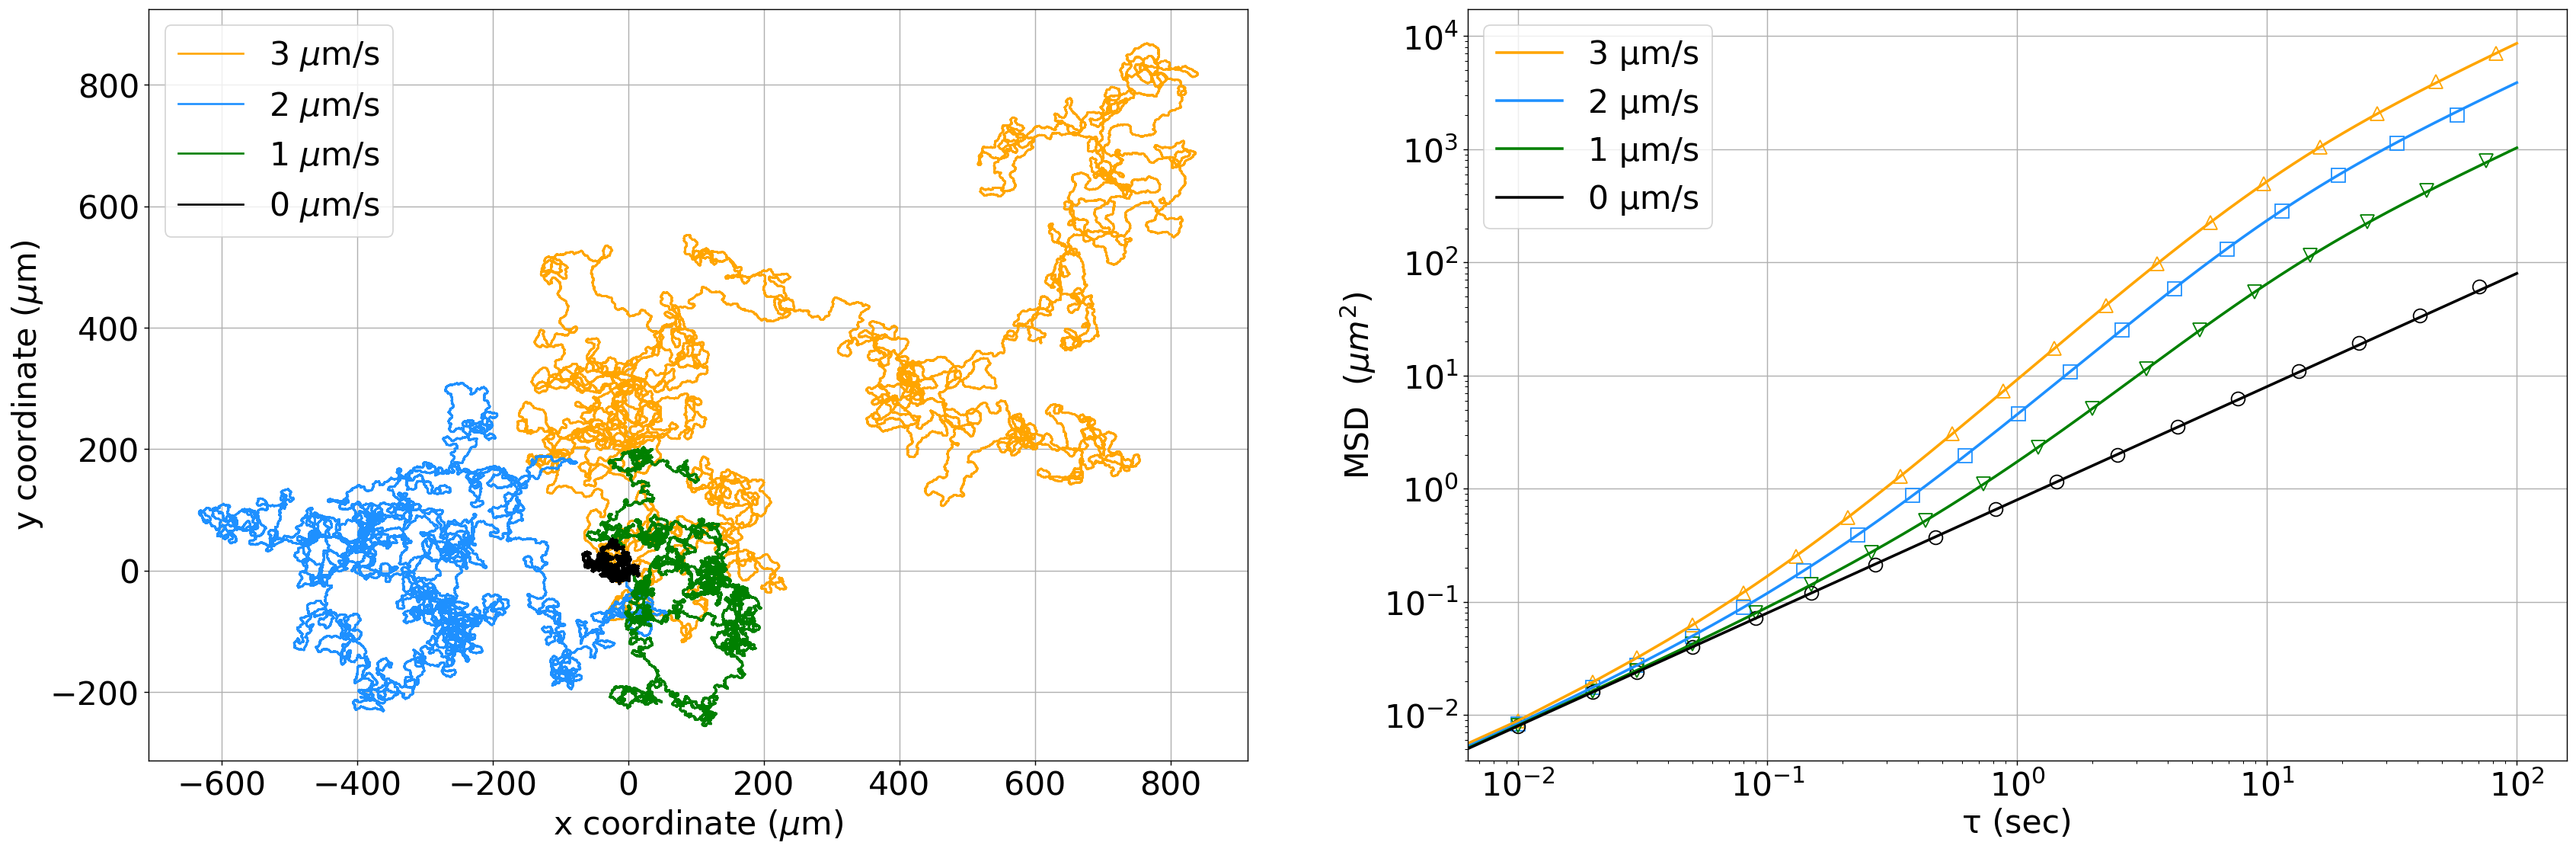

In [9]:
fig = plt.figure(num=None, figsize=(32, 10), dpi=128); 

plt.subplot(121)
rhs(3);    plt.plot(x,y, 'orange',   label="3 $\mu$m/s")
rhs(2);    plt.plot(x,y,'dodgerblue',label="2 $\mu$m/s")
rhs(1);    plt.plot(x,y,'green',     label="1 $\mu$m/s")
rhs(0);    plt.plot(x,y,'black',     label="0 $\mu$m/s")

plt.xlabel("x coordinate ($\mu$m)"); plt.ylabel("y coordinate ($\mu$m)")
plt.legend(); plt.grid()



########----------------
plt.subplot(122)
########----------------
plt.loglog(tm,dr3,mec='orange',linestyle = 'None',marker='^',markevery=0.05,markersize='10',mfc='None')
plt.loglog(tm,dr2,mec='dodgerblue',linestyle='None',marker='s',markevery=0.05,markersize='10',mfc='None')
plt.loglog(tm,dr1,mec='g',linestyle='None',marker='v',markevery=0.05,markersize='10',mfc='None')
plt.loglog(tm,dr0,mec='k',linestyle='None',marker='o',markevery=0.05,markersize='10',mfc='None') 

MSDtheory(3);  plt.loglog(tau,M,'orange', lw=2, label='3 \u03BCm/s')#,marker='d')
MSDtheory(2);  plt.loglog(tau,M,'dodgerblue', lw=2, label='2 \u03BCm/s')#,marker='s')
MSDtheory(1);  plt.loglog(tau,M,'g',  lw=2,label='1 \u03BCm/s')#,marker='^')
MSDtheory(0);  plt.loglog(tau,M,'k', lw=2, label='0 \u03BCm/s')#,marker='o')

plt.xlabel("\u03C4 (sec)"); plt.ylabel("MSD  ($\mu m^2$)")#label='3 \u03BCm/s'
plt.legend(); plt.grid()